# Austin Smart Mobility Data Analysis

## OD Matrix Analysis


### Introduction
This project conducts an Origin Destination Matrix (OD matrix) as a description of movement in a certain area and is used to assess the demand for transportation on different years and different years to make comparisons and therefore better assessment.

## Importing the Data

In [1]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.austintexas.gov", "vT9dyEXWAk1UrzgBe8KXFuaU9")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("7d8e-dm7r", limit=3000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [2]:
# cleaning data
results_df.dropna(axis='rows')

def get_empty_rows(results_df):
    indices = []
    for i, s in results_df.iterrows():
        for v in s.values:
            if str(v).lower() == 'nan':
                if i not in indices:
                    indices.append(i)

    return indices

def get_empty_rows2(results_df):
    indices = []
    for i, s in results_df.iterrows():
        for v in s.values:
            if str(v).lower() == 'null':
                if i not in indices:
                    indices.append(i)

    return indices

list_of_empty_rows = get_empty_rows(results_df)
list_of_empty_rows2 = get_empty_rows(results_df)

deleted = list_of_empty_rows + list_of_empty_rows2

df = results_df.drop(deleted)

In [11]:
df.head(10)

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end,start_time_us_central,end_time_us_central
0,5a23a573-418b-443b-8dc8-d7963fe2b063,5cee599e-832c-4fa5-9050-dcc00e3790f3,scooter,2184,4254.483964627391,2021-11-02T00:45:00.000,2021-11-02T01:15:00.000,2021-11-03T03:16:12.000,11,1,1,9,9,2021,48453001100,48453001100,2021-11-01T19:45:00.000,2021-11-01T20:15:00.000
1,dac12ecc-0f79-4faa-a626-674a7c9f3df2,20014eea-19b2-4643-b3b3-63c31e76e57b,scooter,705,2670.868099468422,2021-11-02T01:30:00.000,2021-11-02T01:30:00.000,2021-11-03T03:16:12.000,11,1,1,3,9,2021,48453000902,48453001100,2021-11-01T20:30:00.000,2021-11-01T20:30:00.000
2,d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e,2cad7083-7af6-4b22-8540-9b9dfffc2f58,scooter,189,258.93874414083393,2021-11-02T01:15:00.000,2021-11-02T01:30:00.000,2021-11-03T03:16:10.000,11,1,1,1,1,2021,48453001100,48453001100,2021-11-01T20:15:00.000,2021-11-01T20:30:00.000
3,3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb,fde91af9-deb8-41cc-9ddc-472ff7653d90,scooter,203,354.08819384429376,2021-11-02T01:30:00.000,2021-11-02T01:30:00.000,2021-11-03T03:16:11.000,11,1,1,1,9,2021,48453001100,48453001100,2021-11-01T20:30:00.000,2021-11-01T20:30:00.000
4,258bea73-5b14-4970-950e-1a1a7c3d715f,b748cae7-7f46-48a7-834d-980565210bf6,scooter,166,757,2022-01-30T17:45:00.000,2022-01-30T17:45:00.000,2022-02-08T03:12:27.000,1,17,6,9,9,2022,48453000604,48453000603,2022-01-30T11:45:00.000,2022-01-30T11:45:00.000
5,3ad306d1-096b-40c1-93f0-7a1d395f1097,75905bd3-b01a-41c2-a4ee-fd142a0e05a4,scooter,1163,5207,2022-01-30T17:30:00.000,2022-01-30T17:45:00.000,2022-02-08T03:12:27.000,1,17,6,5,8,2022,48453001303,48453001911,2022-01-30T11:30:00.000,2022-01-30T11:45:00.000
6,aab89595-63b8-45c8-b994-9e100f8e7f57,fa2e0ef2-8c11-4a81-a32c-4ab885e25aea,bicycle,452,1123,2022-01-30T17:45:00.000,2022-01-30T17:45:00.000,2022-02-08T03:12:27.000,1,17,6,9,9,2022,48453001305,48453001305,2022-01-30T11:45:00.000,2022-01-30T11:45:00.000
7,da1c1d42-c4c3-49fc-9640-2e99698ec1a8,f5ea1498-17aa-4f01-a8a0-fc246b859dea,scooter,1,0,2022-01-30T17:45:00.000,2022-01-30T17:45:00.000,2022-02-08T03:12:28.000,1,17,6,9,9,2022,48453001100,48453001100,2022-01-30T11:45:00.000,2022-01-30T11:45:00.000
8,a08aed52-5d75-46c7-8fd7-2a3136223e82,51555507-1ff0-4f7b-9401-0769d59fa698,scooter,264,1058,2022-01-30T17:30:00.000,2022-01-30T17:30:00.000,2022-02-08T03:12:29.000,1,17,6,9,1,2022,48453001100,48453000901,2022-01-30T11:30:00.000,2022-01-30T11:30:00.000
9,e6fd14b8-eea5-46fc-a940-321c335cce62,4c96f2d2-51b0-4a27-8645-0a200da0f342,scooter,125,671,2022-01-30T17:15:00.000,2022-01-30T17:15:00.000,2022-02-08T03:12:30.000,1,17,6,5,5,2022,48453001303,48453001303,2022-01-30T11:15:00.000,2022-01-30T11:15:00.000


In [12]:
# OD Matrix calculation using pivot table
matrix = (
    df.assign(count=1)
    .pivot_table(index="council_district_start", columns="council_district_end",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype(int)
).sort_values("council_district_start")

matrix

council_district_end,0,1,2,3,4,5,6,7,8,9,10
council_district_start,,,,,,,,,,,
0,1177,6,11,24,0,64,2,3,95,143,3
1,30,72391,13,17095,359,953,1,51,272,76064,132
2,20,6,2660,649,0,125,0,0,6,91,0
3,46,20623,1013,232792,73,3919,2,27,480,114988,121
4,3,309,1,23,2860,8,0,374,1,1035,53
5,134,862,184,4157,13,60180,1,10,5803,44324,260
6,2,0,0,2,0,0,109,0,0,3,3
7,5,29,0,13,377,8,3,2106,0,640,288
8,121,164,4,380,3,5247,0,2,11381,6618,265


In [13]:
# OD matrix - 2nd method
# Group by two different columns
vehicle_type_groups_3d = df.groupby(["council_district_start",
                                     "council_district_end"]).size()
# reset index to change columns used for grouby from 'index' to 'column'
vehicle_type_groups_3d_df = vehicle_type_groups_3d.reset_index()

# Change column name for the count column
vehicle_type_groups_3d_df = vehicle_type_groups_3d_df.rename(columns={0: "Count"}, errors="raise")
vehicle_type_groups_3d_df

,council_district_start,council_district_end,Count
0,0,0,1177
1,0,1,6
2,0,2,11
3,0,3,24
4,0,5,64
...,...,...,...
100,10,6,4
101,10,7,334
102,10,8,231
103,10,9,3436


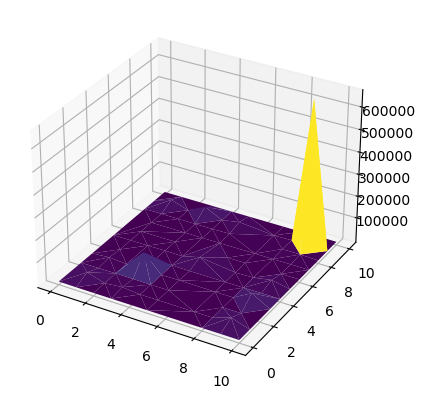

In [8]:
#Plots in 3D
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.plot_trisurf(vehicle_type_groups_3d_df["council_district_start"], 
                vehicle_type_groups_3d_df["council_district_end"], 
                vehicle_type_groups_3d_df["Count"], 
                cmap ='viridis',
                linewidths = 0.2);

OD matrices for different years and different vehicle types

In [14]:
# OD Matrix calculation using pivot table
matrix_year = (
    df.assign(count=1)
    .pivot_table(index="year", columns="vehicle_type",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype(int)
).sort_values("year")

matrix_year

vehicle_type,bicycle,moped,scooter
year,,,
2020,9900,4037,213095
2021,58994,579,2696682
2022,386,14,15653


## Moped OD Matrix

In [15]:
od_matrixـmoped = df.assign(count=1).pivot_table(index="vehicle_type", columns="year",
                 values="count", aggfunc="count").fillna(0).query("vehicle_type == 'moped'")
od_matrixـmoped

year,2020,2021,2022
vehicle_type,,,
moped,4037,579,14


In [16]:
matrixMoped = df.query("vehicle_type == 'moped'")
matrixMoped =matrixMoped.assign(count=1).pivot_table(index="council_district_start", columns="council_district_end",
                 values="count", aggfunc="count").fillna(0)
matrixMoped

council_district_end,0,1,2,3,4,5,7,9,10
council_district_start,,,,,,,,,
0,521.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,140.0,0.0,79.0,2.0,9.0,0.0,81.0,0.0
2,0.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0
3,0.0,80.0,5.0,459.0,0.0,38.0,0.0,339.0,2.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,8.0,0.0,37.0,0.0,236.0,0.0,144.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,70.0,4.0,338.0,1.0,149.0,4.0,1854.0,8.0
10,0.0,1.0,0.0,0.0,0.0,1.0,1.0,7.0,2.0


## Scooter OD Matrix

In [17]:
matrix_scooter = (df.assign(count=1)
    .pivot_table(index="vehicle_type", columns="year",
                 values="count", aggfunc="count").fillna(0)
    .query("vehicle_type == 'scooter'"))
    
matrix_scooter

year,2020,2021,2022
vehicle_type,,,
scooter,213095,2696682,15653


In [18]:
matrixScooter = df.query("vehicle_type == 'scooter'")
matrixScooter =matrixScooter.assign(count=1).pivot_table(index="council_district_start", columns="council_district_end",
                 values="count", aggfunc="count").fillna(0)
matrixScooter

council_district_end,0,1,2,3,4,5,6,7,8,9,10
council_district_start,,,,,,,,,,,
0,568.0,5.0,5.0,21.0,0.0,44.0,2.0,3.0,83.0,135.0,3.0
1,24.0,70047.0,12.0,15921.0,320.0,904.0,1.0,40.0,264.0,74386.0,113.0
2,12.0,6.0,1985.0,481.0,0.0,76.0,0.0,0.0,1.0,49.0,0.0
3,38.0,19266.0,779.0,220918.0,67.0,3507.0,2.0,23.0,418.0,110658.0,94.0
4,2.0,257.0,1.0,15.0,2422.0,2.0,0.0,313.0,1.0,881.0,41.0
5,117.0,810.0,131.0,3773.0,12.0,57182.0,1.0,9.0,5614.0,42648.0,235.0
6,2.0,0.0,0.0,2.0,0.0,0.0,109.0,0.0,0.0,3.0,3.0
7,5.0,26.0,0.0,8.0,322.0,5.0,1.0,1765.0,0.0,548.0,238.0
8,104.0,155.0,3.0,330.0,2.0,5020.0,0.0,2.0,10746.0,6242.0,249.0


## Bicycle OD Matrix

In [19]:
matrix_scooter = (df.assign(count=1)
    .pivot_table(index="vehicle_type", columns="year",
                 values="count", aggfunc="count").fillna(0)
    .query("vehicle_type == 'bicycle'"))
    
matrix_scooter

year,2020,2021,2022
vehicle_type,,,
bicycle,9900,58994,386


In [20]:
matrixbicycle = df.query("vehicle_type == 'scooter'")
matrixbicycle =matrixbicycle.assign(count=1).pivot_table(index="council_district_start", columns="council_district_end",
                 values="count", aggfunc="count").fillna(0)
matrixbicycle

council_district_end,0,1,2,3,4,5,6,7,8,9,10
council_district_start,,,,,,,,,,,
0,568.0,5.0,5.0,21.0,0.0,44.0,2.0,3.0,83.0,135.0,3.0
1,24.0,70047.0,12.0,15921.0,320.0,904.0,1.0,40.0,264.0,74386.0,113.0
2,12.0,6.0,1985.0,481.0,0.0,76.0,0.0,0.0,1.0,49.0,0.0
3,38.0,19266.0,779.0,220918.0,67.0,3507.0,2.0,23.0,418.0,110658.0,94.0
4,2.0,257.0,1.0,15.0,2422.0,2.0,0.0,313.0,1.0,881.0,41.0
5,117.0,810.0,131.0,3773.0,12.0,57182.0,1.0,9.0,5614.0,42648.0,235.0
6,2.0,0.0,0.0,2.0,0.0,0.0,109.0,0.0,0.0,3.0,3.0
7,5.0,26.0,0.0,8.0,322.0,5.0,1.0,1765.0,0.0,548.0,238.0
8,104.0,155.0,3.0,330.0,2.0,5020.0,0.0,2.0,10746.0,6242.0,249.0


In [21]:
matrix_car = (results_df.assign(count=1)
    .pivot_table(index="vehicle_type", columns="year",
                 values="count", aggfunc="count").fillna(0)
    .query("vehicle_type == 'car'"))
    
matrix_car

year,2020,2021,2022
vehicle_type,,,
car,0.0,0.0,482.0


In [22]:
matrixcar = results_df.query("vehicle_type == 'car'")
matrixcar =matrixcar.assign(count=1).pivot_table(index="council_district_start", columns="council_district_end",
                 values="count", aggfunc="count").fillna(0)
matrixcar

council_district_end,None
council_district_start,
None,482


# GeoPandas

In [1]:
import geopandas as gpd
gdf = gpd.read_file("Austin.shp")
print (gdf)

   council_di                                         council__2 created_by  \
0         8.0   http://www.austintexas.gov/department/district-8    RPARKER   
1         6.0   http://www.austintexas.gov/department/district-6    RPARKER   
2         5.0   http://www.austintexas.gov/department/district-5    RPARKER   
3         2.0   http://www.austintexas.gov/department/district-2    RPARKER   
4        10.0  http://www.austintexas.gov/department/district-10    RPARKER   
5         4.0   http://www.austintexas.gov/department/district-4    RPARKER   
6         3.0   http://www.austintexas.gov/department/district-3    RPARKER   
7         1.0   http://www.austintexas.gov/department/district-1    RPARKER   
8         7.0   http://www.austintexas.gov/department/district-7    RPARKER   
9         9.0   http://www.austintexas.gov/department/district-9    RPARKER   

   date_creat    time_creat modified_b  date_modif    time_modif  objectid  \
0  2022-02-25  14:15:50.000    RPARKER  2022-02-25  

<AxesSubplot: >

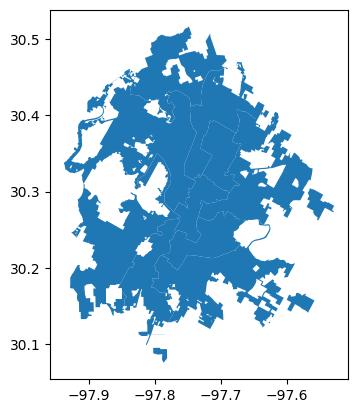

In [2]:
%matplotlib inline
gdf.plot()

<AxesSubplot: >

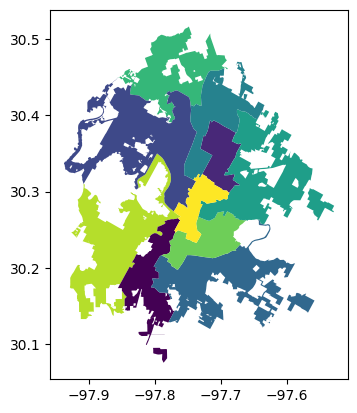

In [3]:
gdf.plot(column='zone', cmap=None)

In this data frame the coordinations are not specified with longitude and latitude but with geoId, therefore, it is not possible to convert this data into flowmap.